# --TICA--

In [1]:
import pyemma.coordinates as coords
import mdtraj as md

### Trajectory and Topology Files

In [2]:
trajfile = 'C:\\Users\\data\\DESRES-Trajectory_sarscov2-10880334-no-water-no-ion-glueCA\\sarscov2-10880334-no-water-no-ion-glueCA\\sarscov2-10880334-no-water-no-ion-glueCA-0000.dcd'
topfile = 'C:\\Users\\data\\DESRES-Trajectory_sarscov2-10880334-no-water-no-ion-glueCA\\sarscov2-10880334-no-water-no-ion-glueCA\\DESRES-Trajectory_sarscov2-10880334-no-water-no-ion-glueCA.pdb'

### Create Featurizer from PDB File, Select Alpha Carbon atoms

In [3]:
feat = coords.featurizer(topfile)
selection = feat.select_Ca()
# just use all xyz-coordinates
feat.add_selection(selection)

In [4]:
feat.describe()[:10]

['ATOM:SER 1 CA 4 x',
 'ATOM:SER 1 CA 4 y',
 'ATOM:SER 1 CA 4 z',
 'ATOM:GLY 2 CA 15 x',
 'ATOM:GLY 2 CA 15 y',
 'ATOM:GLY 2 CA 15 z',
 'ATOM:PHE 3 CA 22 x',
 'ATOM:PHE 3 CA 22 y',
 'ATOM:PHE 3 CA 22 z',
 'ATOM:ARG 4 CA 42 x']

### Define input trajectories without loading them

In [5]:
inp = coords.source(trajfile, feat)
#print('trajectory length = ',inp.trajectory_length(0))
print('number of dimension = ',inp.dimension())

number of dimension =  1836


### Estimate a TICA transformation from inp

In [6]:
lag=100
tica_obj = coords.tica(inp, lag=lag, dim=2, kinetic_map=True)
# here we get the data that has been projected onto the first 2 IC's. It's a list, because we could generally
# have a list of trajectories, so we just get the first element.
Y = tica_obj.get_output()[0]
print('Projected data shape = ', Y.shape)

Projected data shape =  (1000, 2)


### Plot input data from Y

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 0, 'time (1000 ns)')

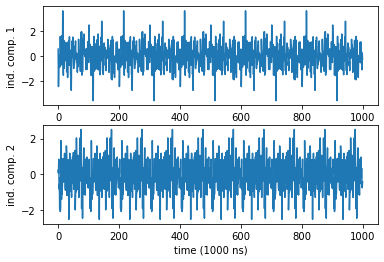

In [7]:
import numpy as np
%pylab inline
subplot2grid((2,1),(0,0))
plot(Y[:,0])
ylabel('ind. comp. 1')
subplot2grid((2,1),(1,0))
plot(Y[:,1])
ylabel('ind. comp. 2')
xlabel('time (1000 ns)')
Text(0.5,0,'time (1000 ns)')

In [8]:
print('Mean values: ', np.mean(Y, axis=0))
print('Variances:   ', np.var(Y, axis=0))

Mean values:  [-9.0599057e-09 -2.9802324e-11]
Variances:    [0.99999964 0.9999999 ]


<ipython-input-40-7ea9b5544673>:4: RuntimeWarning: divide by zero encountered in log
  F = -np.log(z)


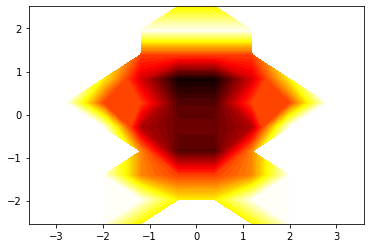

In [40]:
# histogram data
z,x,y = np.histogram2d(Y[:,0],Y[:,1])
# compute free energies
F = -np.log(z)
# contour plot
extent = [x[0], x[-1], y[0], y[-1]]
#fig = plt.subplots()
contourf(F.T,50,cmap=plt.cm.hot, extent=extent)
#cbar = fig.colorbar(cf)
#cbar.set_clim( vmin, vmax )


In [20]:
cl = coords.cluster_kmeans(data=Y, k=100, stride=1)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]

initialize kmeans++ centers:   0%|                                                             | 0/100 [00:00<…

kmeans iterations:   0%|                                                                        | 0/10 [00:00<…

# K means

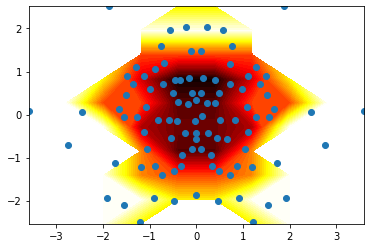

In [21]:
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(cc_x,cc_y, linewidth=0, marker='o')

# Uniform Time

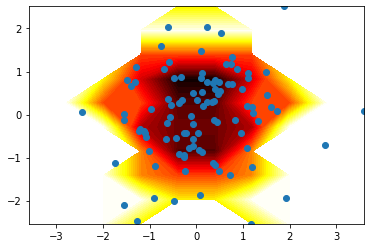

In [12]:
clu = coords.cluster_uniform_time(data=Y, k=100)
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(clu.clustercenters[:,0], clu.clustercenters[:,1], linewidth=0, marker='o')

# Regspace

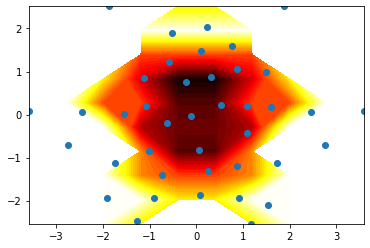

In [13]:
clr = coords.cluster_regspace(data=Y, dmin=0.5)
contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plot(clr.clustercenters[:,0], clr.clustercenters[:,1], linewidth=0, marker='o')

# --PCA--

Text(0.5, 0, 'time (10 ns)')

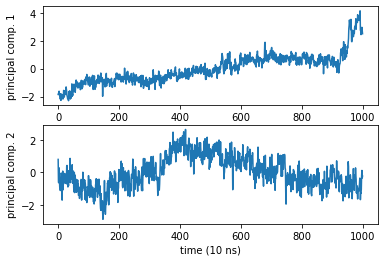

In [14]:
pca_obj = coords.pca(inp, dim=2)
Ypca = pca_obj.get_output()[0]
subplot2grid((2,1),(0,0))
plot(Ypca[:,0])
ylabel('principal comp. 1')
subplot2grid((2,1),(1,0))
plot(Ypca[:,1])
ylabel('principal comp. 2')
xlabel('time (10 ns)')

<ipython-input-30-11e707f61059>:4: RuntimeWarning: divide by zero encountered in log
  F_ = -np.log(z_)


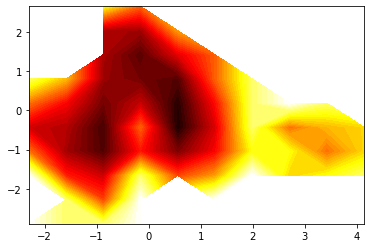

In [30]:
# histogram data
z_,x_,y_ = np.histogram2d(Ypca[:,0],Ypca[:,1])
# compute free energies
F_ = -np.log(z_)
# contour plot
extent_ = [x_[0], x_[-1], y_[0], y_[-1]]
contourf(F_.T,50,cmap=plt.cm.hot, extent=extent_)

In [16]:
cl = coords.cluster_kmeans(data=Ypca, k=100, stride=1)
# for later use we save the discrete trajectories and cluster center coordinates:
dtrajs = cl.dtrajs
cc_x = cl.clustercenters[:,0]
cc_y = cl.clustercenters[:,1]

initialize kmeans++ centers:   0%|                                                             | 0/100 [00:00<…

kmeans iterations:   0%|                                                                        | 0/10 [00:00<…

# K means

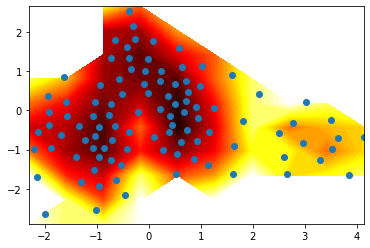

In [17]:
contourf(F_.T, 50, cmap=plt.cm.hot, extent=extent_)
plot(cc_x,cc_y, linewidth=0, marker='o')

# Uniform Time

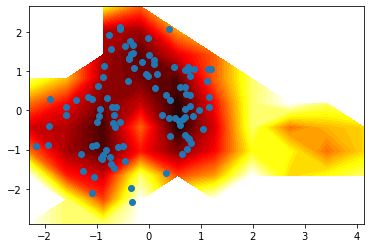

In [18]:
clu = coords.cluster_uniform_time(data=Ypca, k=100)
contourf(F_.T, 50, cmap=plt.cm.hot, extent=extent_)
plot(clu.clustercenters[:,0], clu.clustercenters[:,1], linewidth=0, marker='o')

# Reg space

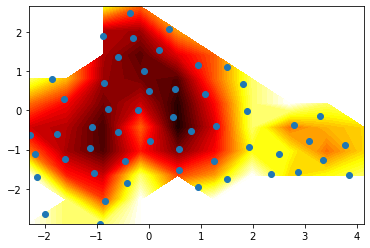

In [19]:
clr = coords.cluster_regspace(data=Ypca, dmin=0.5)
contourf(F_.T, 50, cmap=plt.cm.hot, extent=extent_)
plot(clr.clustercenters[:,0], clr.clustercenters[:,1], linewidth=0, marker='o')